In [1]:
#This project is made by Rahul nyati in my ITS Seminar
#By RAhul Nyati
#Import necessary  libraries 
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)


In [2]:
#load the data
sold = pd.read_csv('sell.csv')
trans = pd.read_csv('transaction.csv')
dinfo = pd.read_csv('info.csv')

In [3]:
sold.head()


,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [4]:
sold.describe()


,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


In [5]:
sold.describe(include = ['O']) 


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [6]:
sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
SELL_ID          11 non-null int64
SELL_CATEGORY    11 non-null int64
ITEM_ID          11 non-null int64
ITEM_NAME        11 non-null object
dtypes: int64(3), object(1)
memory usage: 432.0+ bytes


In [7]:
trans.head()


,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [8]:
trans.describe()


,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


In [9]:
trans.describe(include = ['O'])


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [10]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
CALENDAR_DATE    5404 non-null object
PRICE            5404 non-null float64
QUANTITY         5404 non-null int64
SELL_ID          5404 non-null int64
SELL_CATEGORY    5404 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 211.2+ KB


In [11]:
dinfo.head()


,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [12]:
dinfo.describe()


,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [13]:
dinfo.describe(include = ['O'])


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [14]:
dinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
CALENDAR_DATE          1349 non-null object
YEAR                   1349 non-null int64
HOLIDAY                105 non-null object
IS_WEEKEND             1349 non-null int64
IS_SCHOOLBREAK         1349 non-null int64
AVERAGE_TEMPERATURE    1349 non-null float64
IS_OUTDOOR             1349 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 73.9+ KB


In [15]:
# now we check missing value
sold.isnull().sum()


SELL_ID          0
SELL_CATEGORY    0
ITEM_ID          0
ITEM_NAME        0
dtype: int64

In [16]:
trans.isnull().sum()


CALENDAR_DATE    0
PRICE            0
QUANTITY         0
SELL_ID          0
SELL_CATEGORY    0
dtype: int64

In [17]:
dinfo.isnull().sum()

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
dtype: int64

In [18]:
#now we seen the no missing values in sold and in transaction but the missing values found  in dinfo 
#now we handle the missing values 
dinfo['HOLIDAY'] = dinfo['HOLIDAY'].fillna("No Holiday")


In [19]:
dinfo.isnull().sum()

CALENDAR_DATE          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64

In [20]:
dinfo.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0


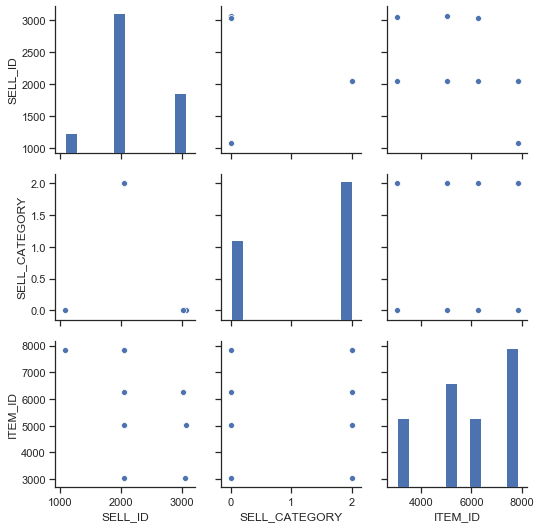

In [21]:
# now visualize the data
sns.pairplot(sold)


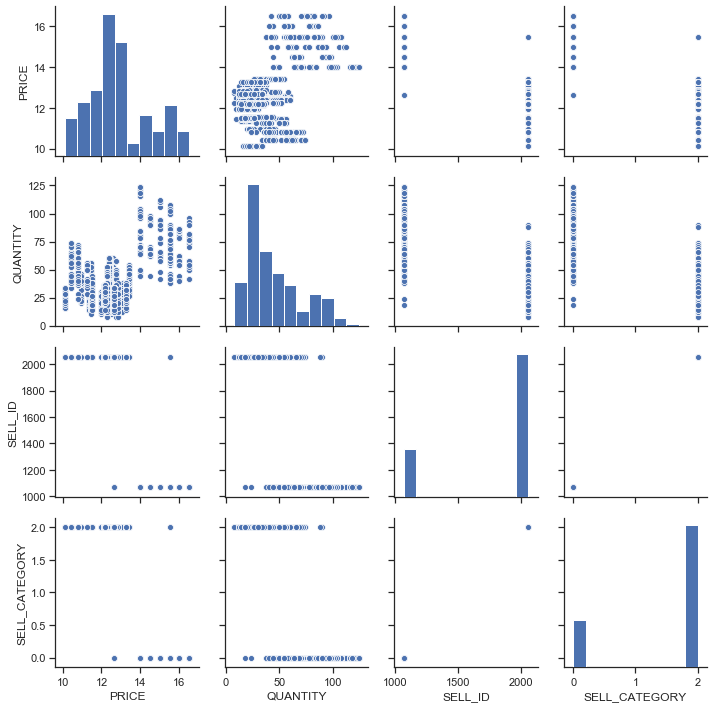

In [22]:
sns.pairplot(trans)


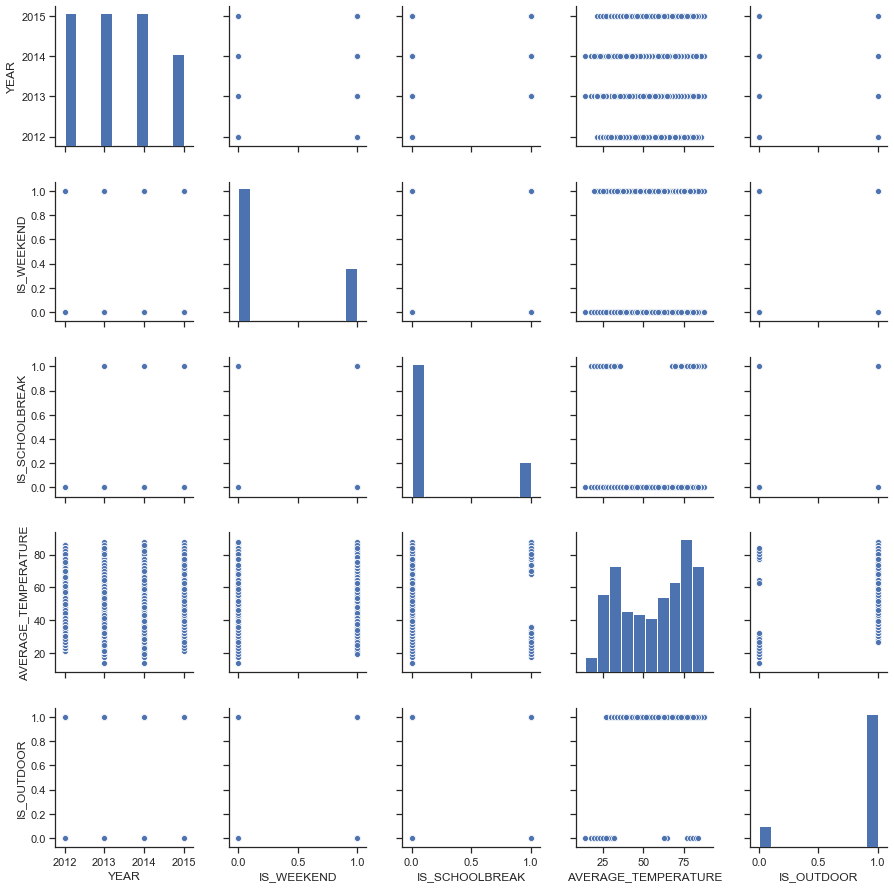

In [23]:
sns.pairplot(dinfo)



(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

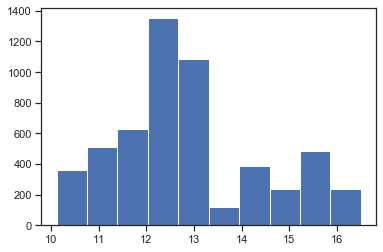

In [24]:
plt.hist(trans.PRICE)

In [25]:
np.unique(dinfo['HOLIDAY'])


array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [26]:
dinfo['CALENDAR_DATE'].min()


'1/1/12'

In [27]:
dinfo['CALENDAR_DATE'].max()


'9/9/15'

In [28]:
dinfo.shape

(1349, 7)

In [29]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [30]:

pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [31]:
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), trans.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [32]:
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

In [33]:
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50     46
                                   01/01/13       15.50     60
                                   01/01/14       15.50     72
                                   01/01/15       14.00     66
                                   01/02/12       15.50     70
                                   01/02/13       15.50     68
                                   01/02/14       15.50     76
                                   01/02/15       14.00    102
                                   01/03/12       15.50     62
                                   01/03/13       15.50     70
                                   01/03/14       15.50     68
                                   01/03/15       14.00     68
                                   01/04/12       15.50     88
                                   01/04/13       15.50    100
                                   01/04/14       15.50     74

In [34]:
data1.shape

(10808, 6)

In [35]:
intermediate_data = b.reset_index()

In [36]:
data1.shape

(10808, 6)

In [37]:
b.shape

(10792,)

In [38]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [39]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [40]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [41]:
combined_data = pd.merge(intermediate_data, dinfo, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [42]:
combined_data.shape

(6696, 12)

In [43]:
np.unique(combined_data['HOLIDAY'])


array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

In [44]:
np.unique(combined_data['IS_WEEKEND'])


array([0, 1], dtype=int64)

In [45]:
np.unique(combined_data['IS_SCHOOLBREAK'])

array([0, 1], dtype=int64)

In [46]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]

In [47]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [48]:
bau_data.shape

(3768, 12)

In [49]:
np.unique(bau_data['HOLIDAY'])


array(['No Holiday'], dtype=object)

In [50]:
np.unique(bau_data['IS_WEEKEND'])


array([0], dtype=int64)

In [51]:
np.unique(bau_data['IS_SCHOOLBREAK'])

array([0], dtype=int64)

In [52]:
bau_data[bau_data['IS_WEEKEND']==1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [53]:
bau_data[bau_data['HOLIDAY']!='No Holiday']

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

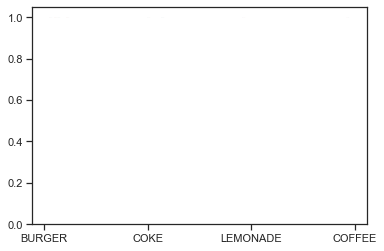

In [54]:
# Data exploration
plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

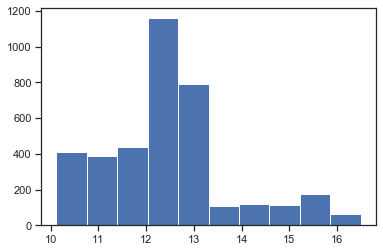

In [55]:
plt.hist(bau_data.PRICE)

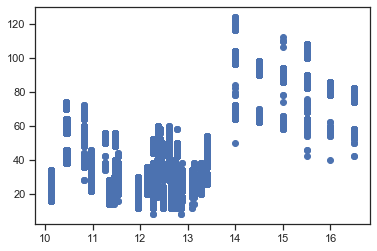

In [56]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

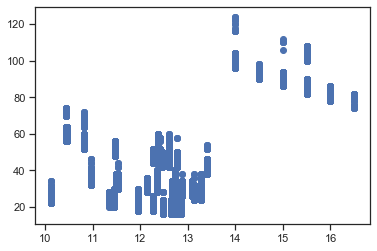

In [57]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

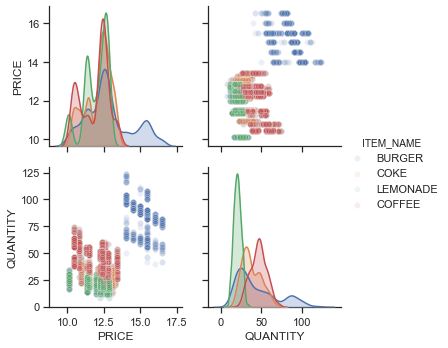

In [58]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

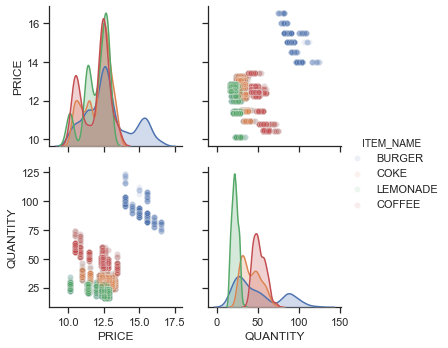

In [59]:
sns.pairplot(bau_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

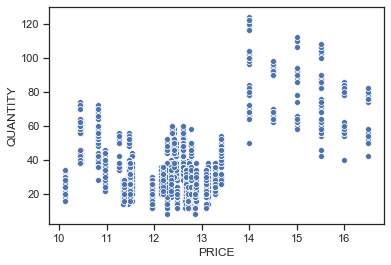

In [60]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

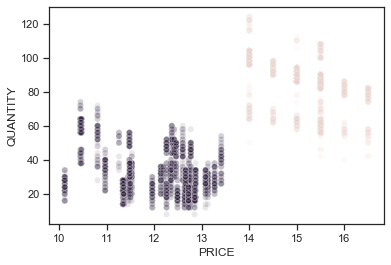

In [62]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [63]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [64]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

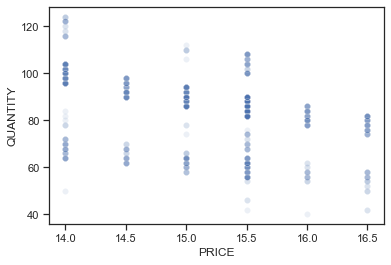

In [65]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

In [66]:
model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.45e-32
Time:                        00:00:25   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

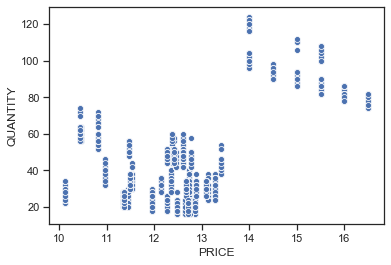

In [67]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

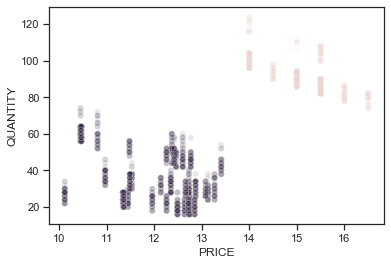

In [68]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
# print(burger)
# print(burger.describe())
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [69]:
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [70]:
np.unique(bau_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

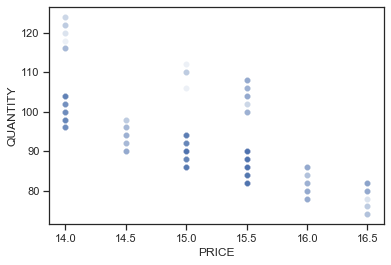

In [71]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           7.16e-70
Time:                        00:00:50   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

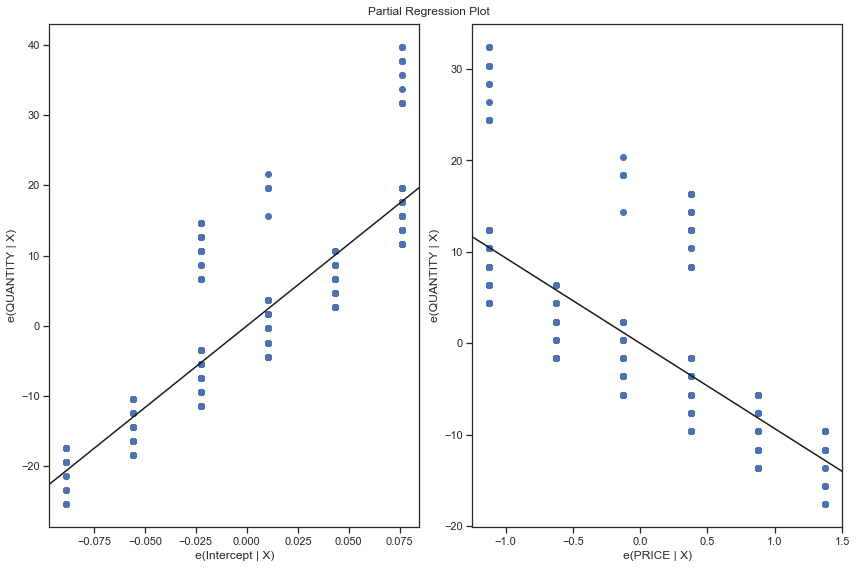

In [72]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

In [75]:
#Now we Let's look at the bau data again to see if there is anything else in the data we can use to further refine our model.
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [76]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

In [81]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]
burger_1070.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
88,1070,0,BURGER,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
120,1070,0,BURGER,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
448,1070,0,BURGER,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1
576,1070,0,BURGER,1/31/12,15.5,84,2012,No Holiday,0,0,32.0,1


In [82]:
burger_1070.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


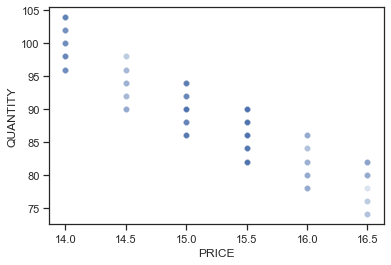

In [83]:
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

In [84]:
#Now its more clear Now we Check our model perfomance by R squareed value


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):          5.51e-153
Time:                        00:08:00   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

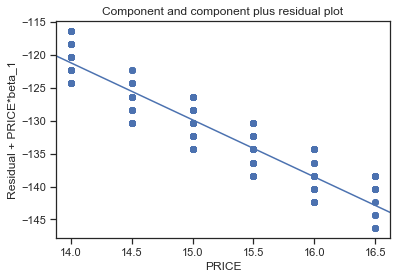

In [85]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

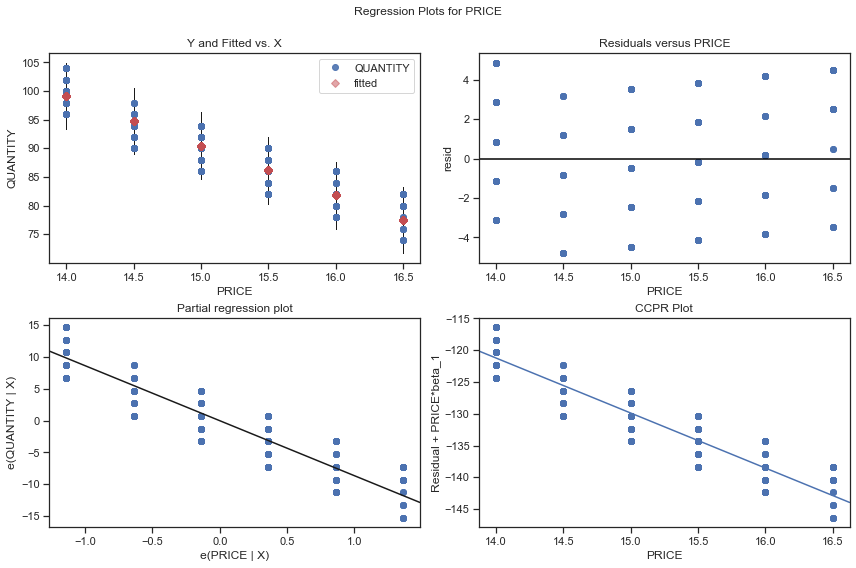

In [86]:
#Now we get the value of R square which is more better than previous and its much better 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

In [87]:
#now WE Cacluate for others one by one by putting the diffrenet values 
#Now its times to calculate for burger 2051
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]
burger_2051.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
25,2051,2,BURGER,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
33,2051,2,BURGER,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


In [88]:
burger_2051.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


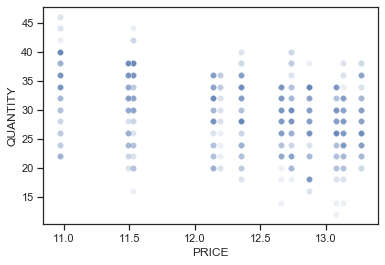

In [89]:
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           4.45e-27
Time:                        00:11:10   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

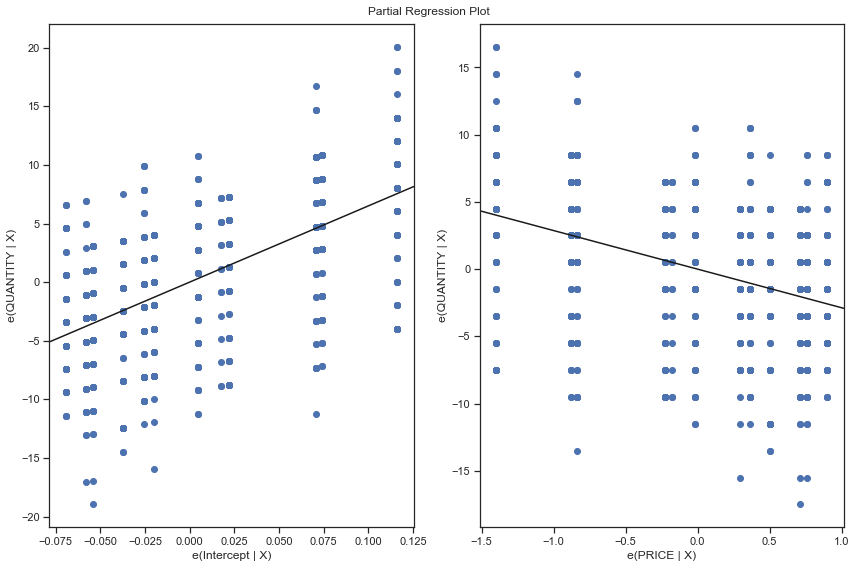

In [90]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

In [91]:
#Now we cacluate for coke
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
10,2051,2,COKE,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
15,2053,2,COKE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
18,2051,2,COKE,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0


In [93]:
coke.shape

(1674, 12)

In [94]:
coke.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1674.000000,1674.0,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2052.000000,2.0,12.151326,38.150538,2013.351254,0.284349,0.200717,56.255914,0.878136
std,1.000299,0.0,0.871405,11.861375,1.062726,0.451239,0.400656,19.999336,0.327226
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,30.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.000000,2.0,12.770000,48.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


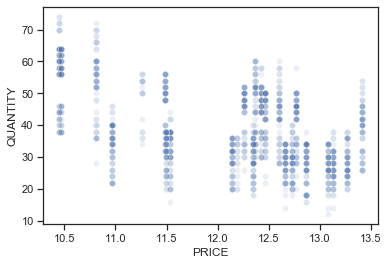

In [95]:
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Fri, 25 Dec 2020   Prob (F-statistic):          1.94e-104
Time:                        00:13:33   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

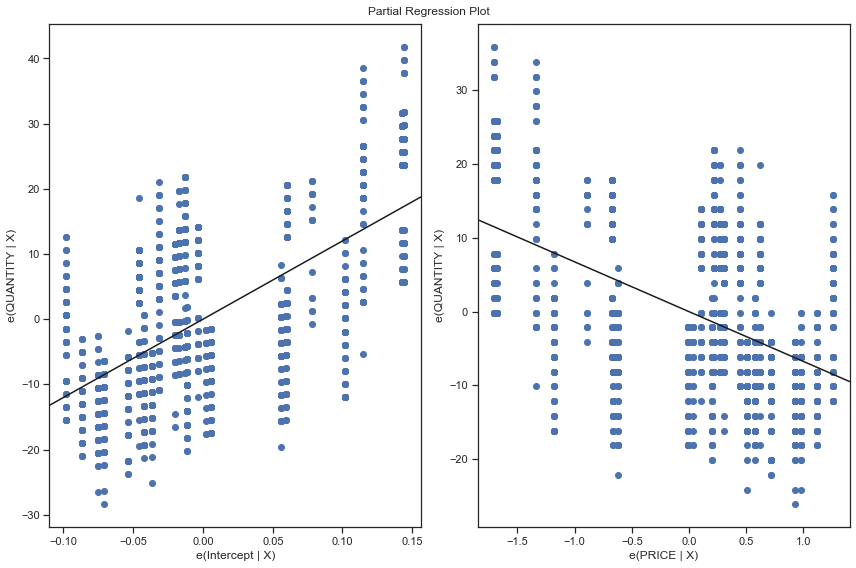

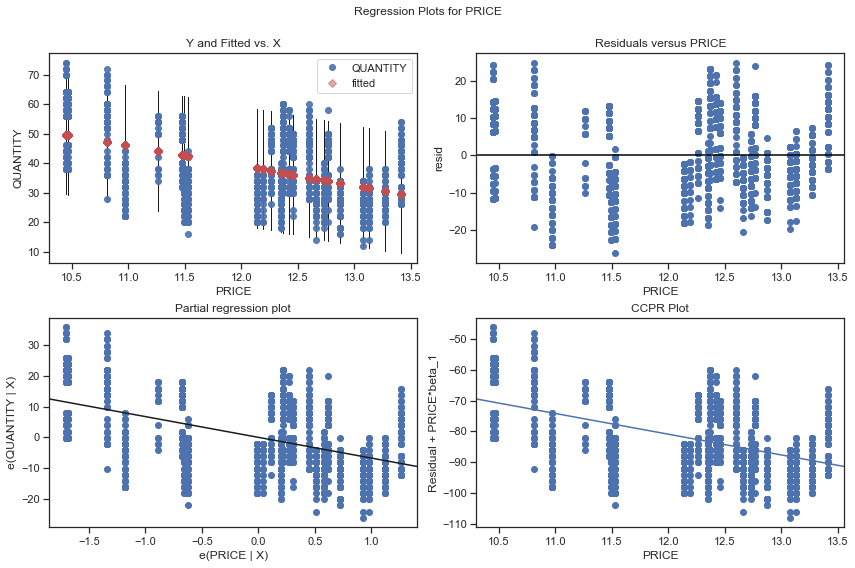

In [96]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

In [97]:

#Now Its time to caculate for coffee
df = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
df.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,2053,2,COFFEE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
14,2053,2,COFFEE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
22,2053,2,COFFEE,1/13/14,12.37,60,2014,No Holiday,0,0,28.4,0
30,2053,2,COFFEE,1/13/15,10.81,66,2015,No Holiday,0,0,28.4,0
38,2053,2,COFFEE,1/14/12,12.60,42,2012,No Holiday,1,0,23.0,0


In [98]:
df.shape

(837, 12)

In [99]:
df.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2053.0,2.0,11.934636,46.802867,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.947643,9.909910,1.063043,0.451373,0.400776,20.005316,0.327324
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,40.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,48.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.0,2.0,12.600000,54.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


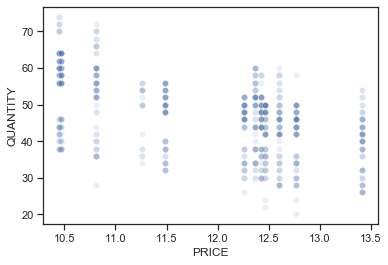

In [100]:
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           6.20e-62
Time:                        00:15:52   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

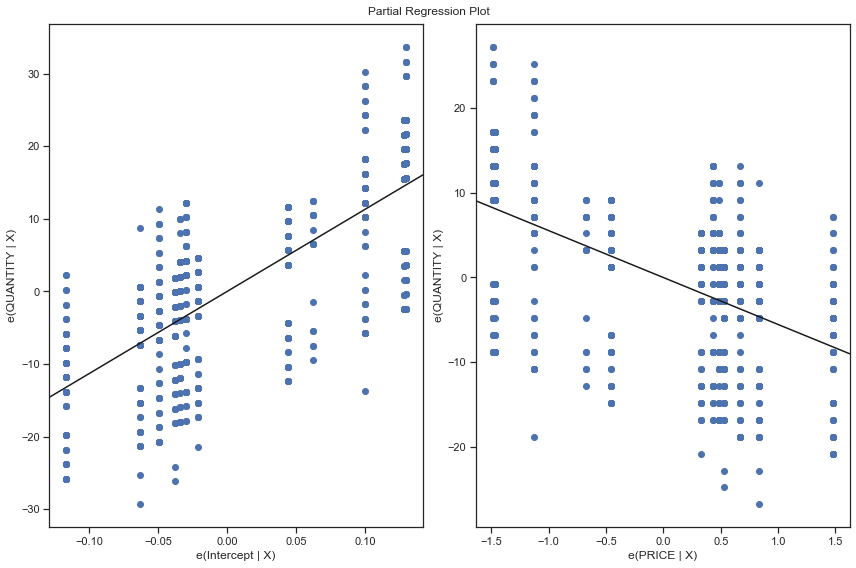

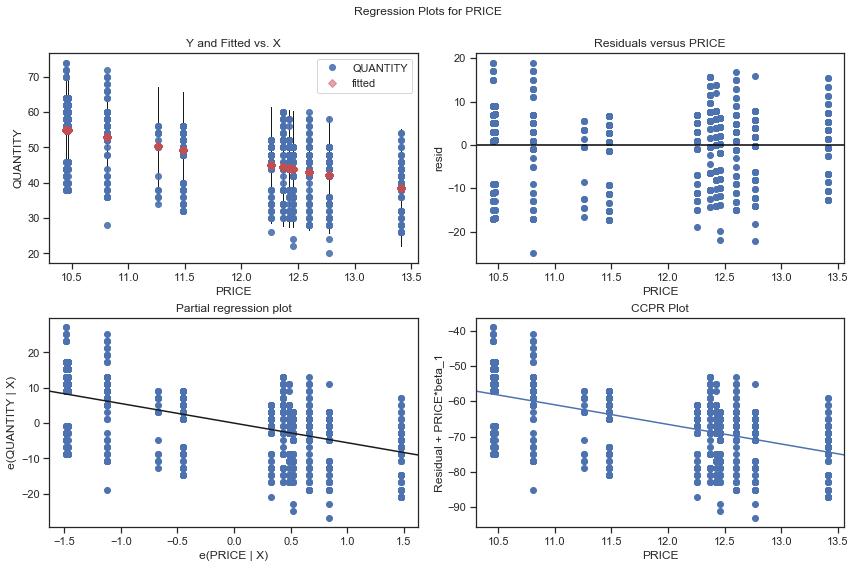

In [101]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [102]:
#Now Its Time to calculate for lemonoide
df = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
df.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
12,2052,2,LEMONADE,1/13/13,12.64,18,2013,No Holiday,1,0,30.2,0
20,2052,2,LEMONADE,1/13/14,11.96,24,2014,No Holiday,0,0,28.4,0
28,2052,2,LEMONADE,1/13/15,11.45,28,2015,No Holiday,0,0,28.4,0
36,2052,2,LEMONADE,1/14/12,12.75,20,2012,No Holiday,1,0,23.0,0


In [103]:
df.shape

(837, 12)

In [104]:
df.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2052.0,2.0,11.976918,20.910394,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.820698,4.514501,1.063043,0.451373,0.400776,20.005316,0.327324
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,12.850000,34.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


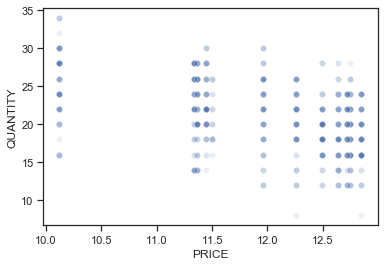

In [105]:
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           7.46e-46
Time:                        00:17:48   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

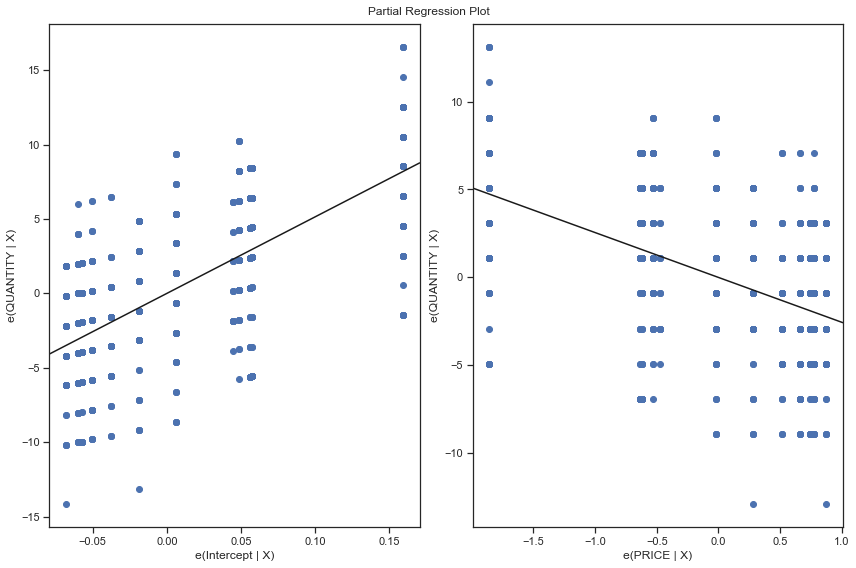

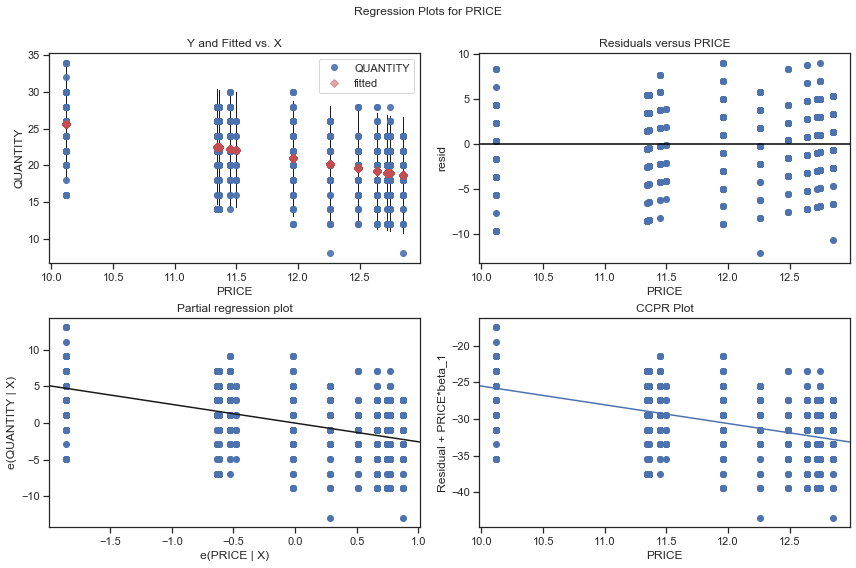

In [106]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [107]:
#we calculate for all items Now we calcualate the elasticity by creating functions and call again and again to use that function

In [108]:
elasticities = {}

In [109]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -8.658581488470569
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):          5.51e-153
Time:                        00:20:07   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


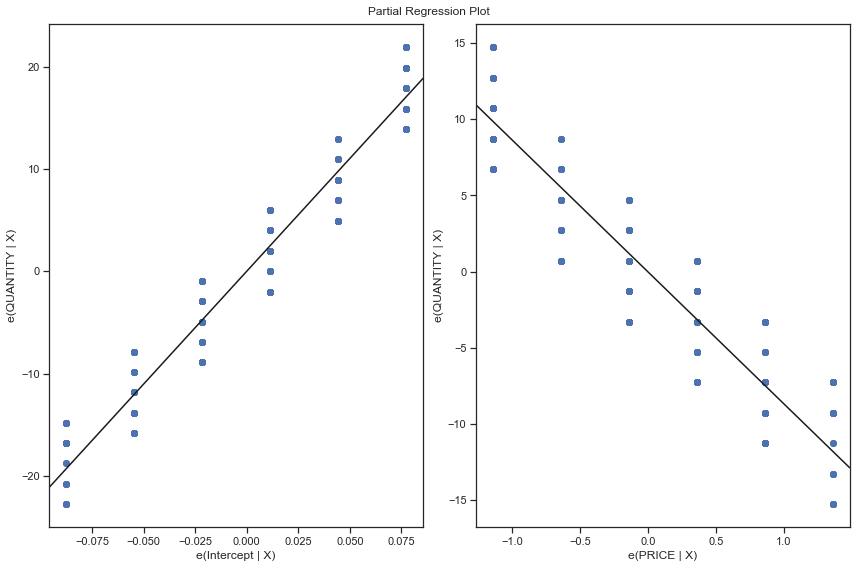

In [110]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -3.618990615456312
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.34e-58
Time:                        00:20:25   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


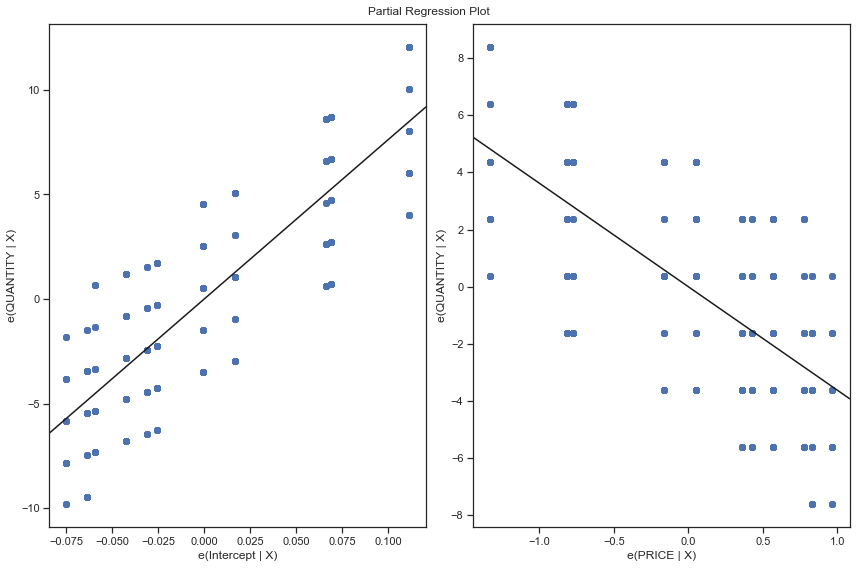

In [111]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -2.856702984559962
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           5.32e-53
Time:                        00:20:47   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


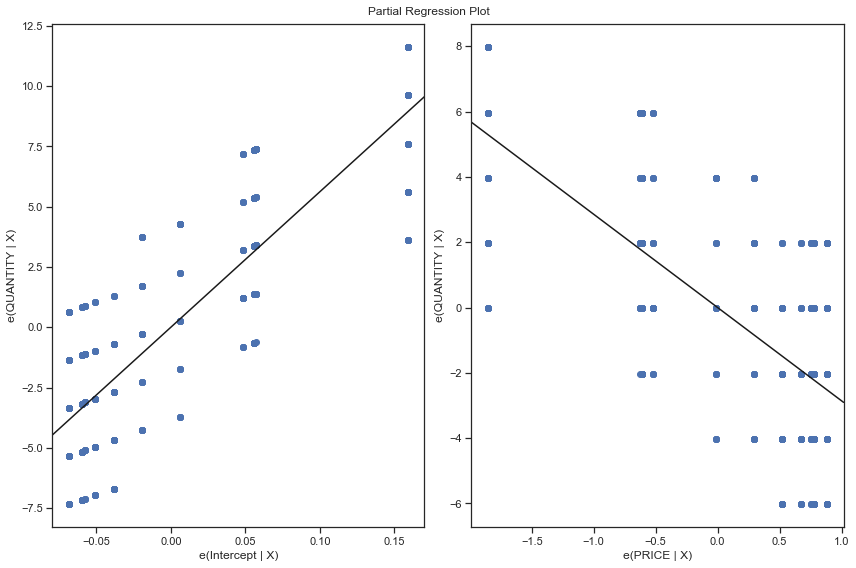

In [112]:
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

Price elasticity of the product: -6.164156666230159
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):          3.72e-152
Time:                        00:21:07   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


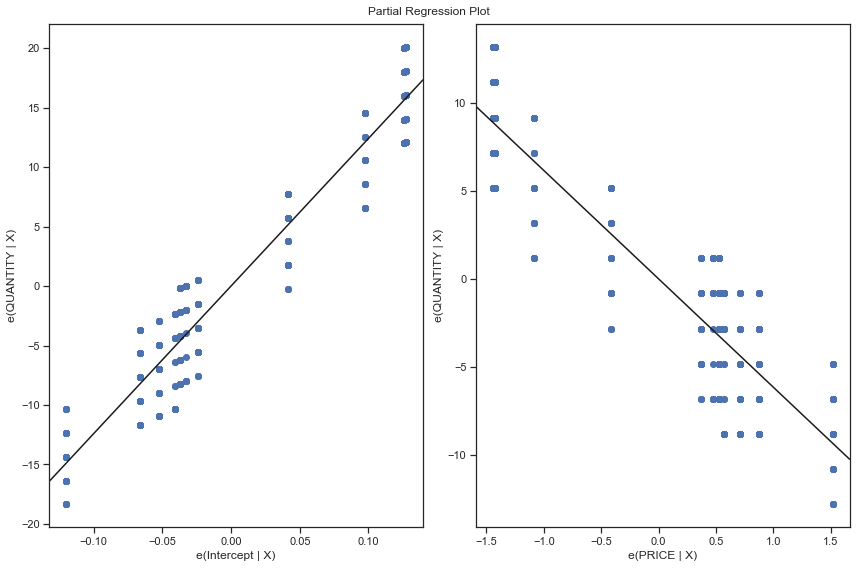

In [113]:
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

Price elasticity of the product: -7.4601034850849945
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           2.00e-82
Time:                        00:21:22   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

(-7.4601034850849945,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20fa15a3ba8>)

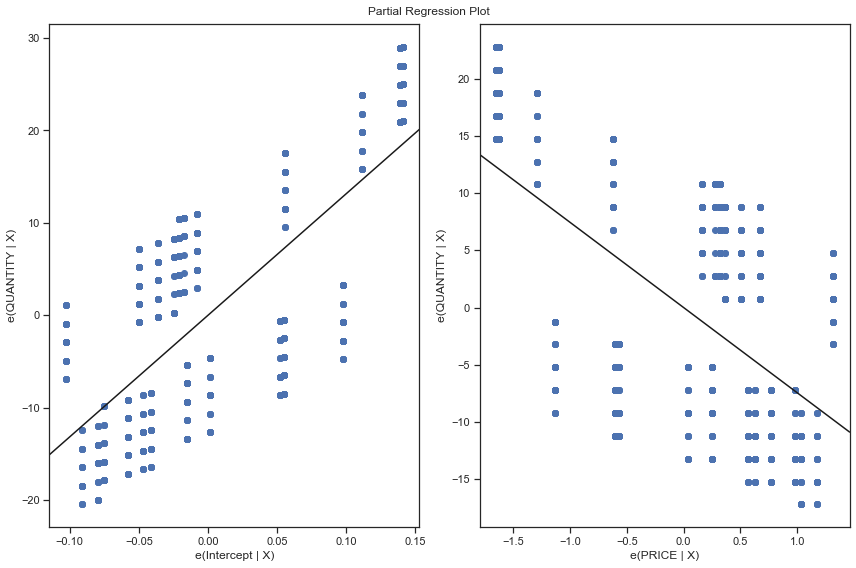

In [114]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

In [115]:
#2 coke are available in combo, while 1 is available as single.. So it is likely that the bottom distribution belongs to single purchases of coke. Let's verfy this

In [116]:
coke_data = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 3067)]
elasticities['coke_3067'], model_coke_3067 = create_model_and_find_elasticity(coke_data)

ValueError: zero-size array to reduction operation maximum which has no identity

In [117]:
#now we check coke data
coke_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


Price elasticity of the product: -6.164156666230159
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):          3.72e-152
Time:                        00:23:42   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


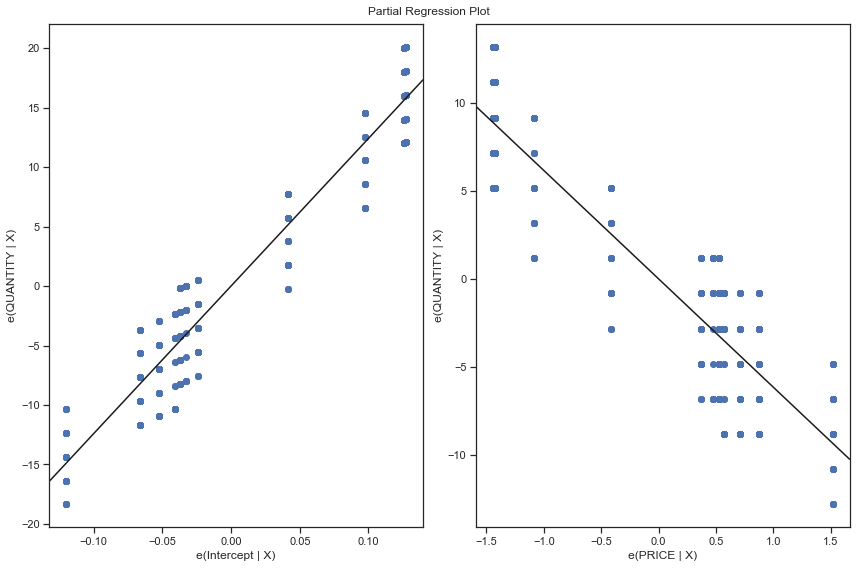

In [118]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticity of the product: -3.618990615456312
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.34e-58
Time:                        00:24:00   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


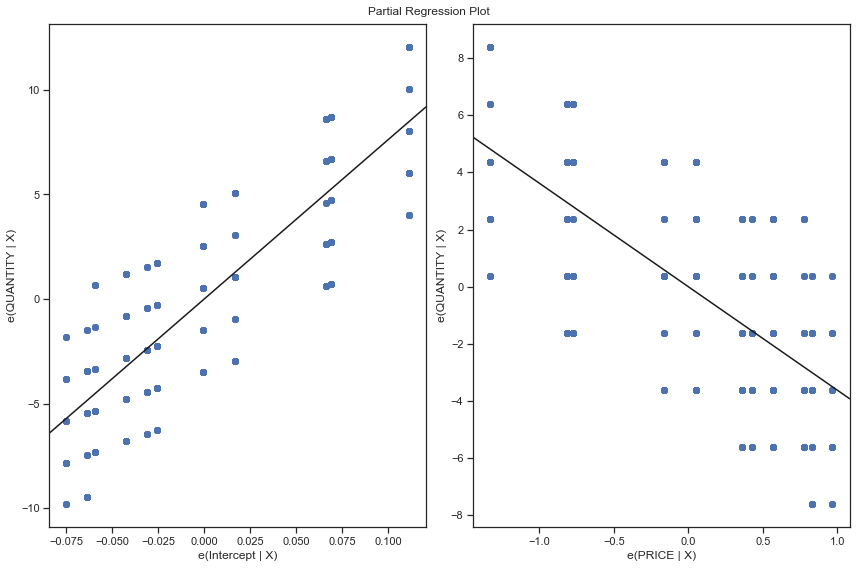

In [119]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)

Price elasticity of the product: -2.856702984559962
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           5.32e-53
Time:                        00:24:21   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


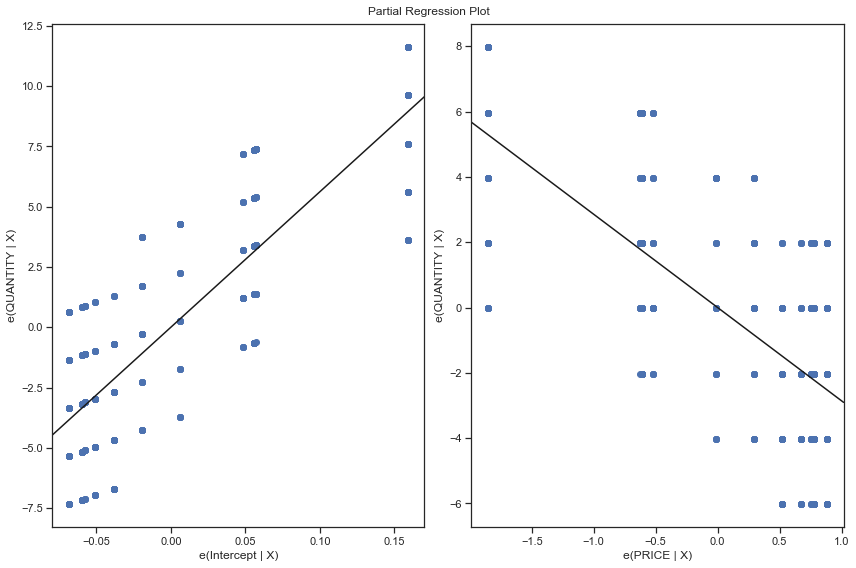

In [120]:
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

In [121]:
lemonade_data_3028 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 3028)]
elasticities['lemonade_3028'], model_lemonade_3028 = create_model_and_find_elasticity(lemonade_data_3028)

ValueError: zero-size array to reduction operation maximum which has no identity

Price elasticity of the product: -6.164156666230159
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):          3.72e-152
Time:                        00:24:59   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


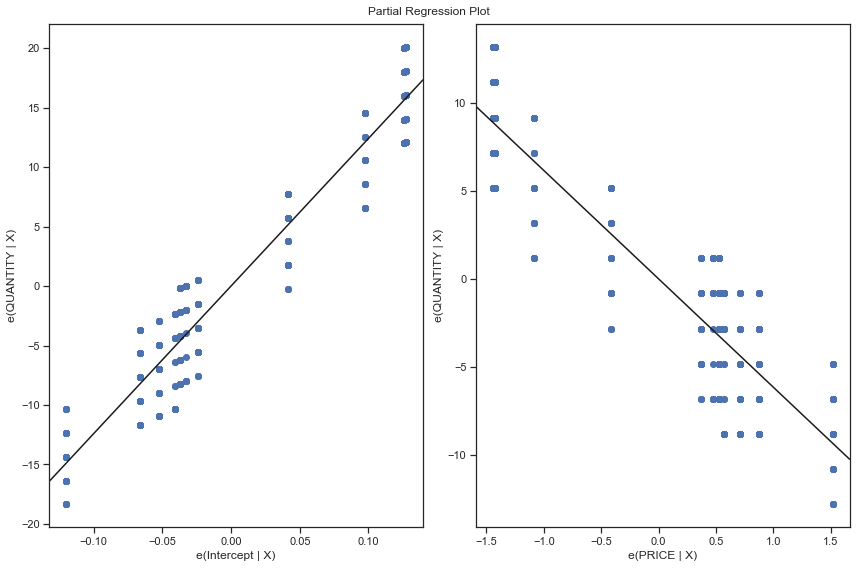

In [122]:
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

In [123]:
coffee_data_3055 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 3055)]
elasticities['coffee_3055'], model_coffee_3055 = create_model_and_find_elasticity(coffee_data_3055)

ValueError: zero-size array to reduction operation maximum which has no identity

In [124]:
#NOw we find elasticity for all products some of the products we coludnt find due to  zero-size array to reduction operation maximum which has no identity
elasticities

{'burger_1070': -8.658581488470569,
 'burger_2051': -3.618990615456312,
 'burger_2052': -2.856702984559962,
 'burger_2053': -6.164156666230159,
 'coke_2053': -6.164156666230159,
 'coke_2051': -3.618990615456312,
 'lemonade_2052': -2.856702984559962,
 'coffee_2053': -6.164156666230159}

In [125]:
#Now we find optimal price for maximum profit
coke_data = coke_data_2053

In [126]:
coke_data.PRICE.min()

10.45

In [127]:
coke_data.PRICE.max()

13.41

In [134]:
#Let's take 9 as the buying price of coke. We now want to be able to set the price of coke to get the maximum profit. PRICE is the selling price
buying_price_coke = 9

In [135]:
start_price = 9.5
end_price = 20

In [136]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [137]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [138]:
test['QUANTITY'] = model_coke_2051.predict(test['PRICE'])

In [139]:
test

,PRICE,QUANTITY
0,9.50,41.759021
1,9.51,41.722831
2,9.52,41.686641
3,9.53,41.650451
4,9.54,41.614261
5,9.55,41.578071
6,9.56,41.541881
7,9.57,41.505691
8,9.58,41.469501
9,9.59,41.433312


In [140]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]

In [141]:
test

,PRICE,QUANTITY,PROFIT
0,9.50,41.759021,20.879510
1,9.51,41.722831,21.278644
2,9.52,41.686641,21.677053
3,9.53,41.650451,22.074739
4,9.54,41.614261,22.471701
5,9.55,41.578071,22.867939
6,9.56,41.541881,23.263454
7,9.57,41.505691,23.658244
8,9.58,41.469501,24.052311
9,9.59,41.433312,24.445654


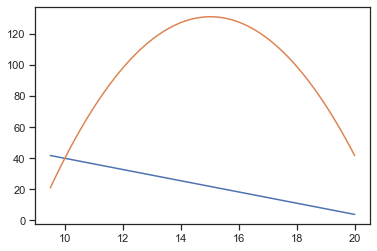

In [142]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

In [143]:
#Let's find the exact price at which maximum profit is gained:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [144]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
552,15.02,21.782193,131.128799


In [145]:
#Now Its time to create the fuction which finds the optimal price of products
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit

In [146]:
optimal_price = {}
buying_price = 9

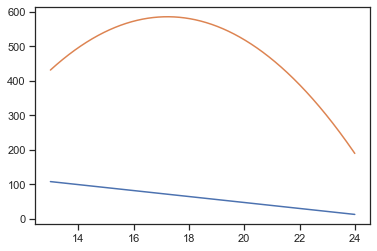

In [147]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

In [148]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572}

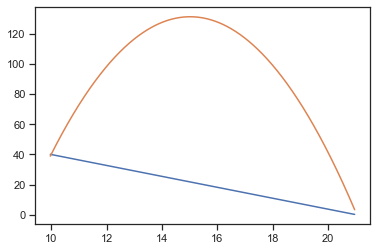

In [149]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)

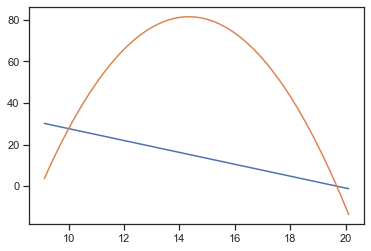

In [150]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

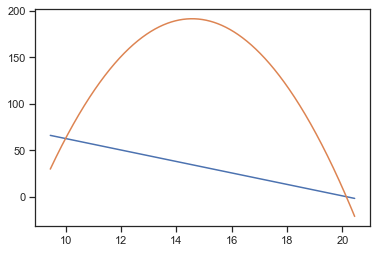

In [151]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

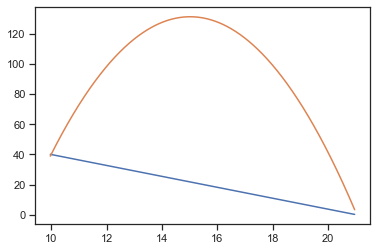

In [152]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

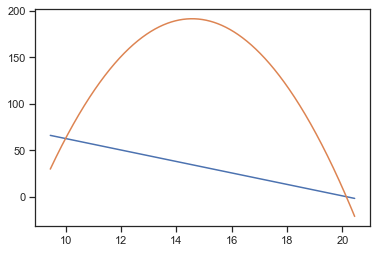

In [154]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

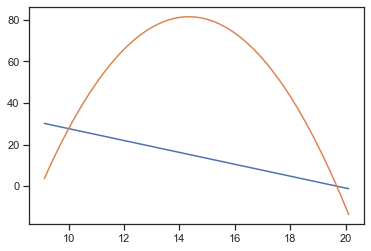

In [155]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

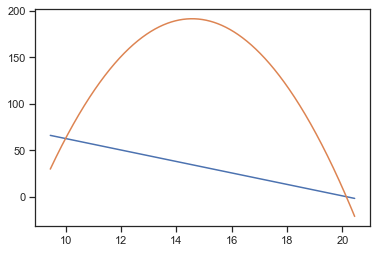

In [156]:
optimal_price['coffee_2053'] = find_optimal_price(coffee_data_2053, model_coffee_2053, buying_price)

In [157]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825}

In [ ]:
#Summary of the project
#This is the price a cafe has to put on its item in order to make the most profit based on past sales data. 
#It is important to note that this is a normal day. On other ‘similar’ days like a holiday, or an event that
#happens has a different impact on customer purchasing behavior and pattern. Often an increase in usage is seen in those days.
#These should be treated differently. Similarly, it is important to remove any external effects other than price that will affect
#the conduct of customer purchases including datapoints when the item is still discounted.
#Once new prices have been introduced, it is important to continuously monitor sales and profits.
#If this pricing method is part of the product, a dashboard can be built for the purpose of monitoring these items
#and calculating the increase in profits.